# Outlier Analysis

In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds') 
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64']) 
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table=df["table"].copy()

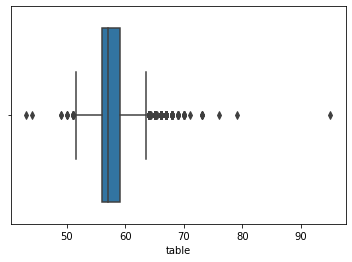

In [3]:
sns.boxplot(x=df_table);

* Lines can be thought of as lower bound and upper bound values.All points other than these two lines can be considered as outlier observations.

In [4]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1 #IQR==>>Inter quartile

In [5]:
lower_bound=Q1-1.5*IQR
lower_bound

51.5

In [6]:
upper_bound=Q3+1.5*IQR
upper_bound

63.5

## Catching the outlier observations

In [7]:
(df_table < lower_bound) | (df_table > upper_bound) 

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [8]:
lower_outlier= df_table < lower_bound
lower_outlier[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [9]:
upper_outlier= df_table > upper_bound
upper_outlier[0:10]

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

## Catching the values of  outlier observations

In [10]:
vals_low_outlier= df_table[lower_outlier]
vals_low_outlier

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [11]:
vals_up_outlier= df_table[upper_outlier]
vals_up_outlier

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [12]:
vals_low_outlier.index [0:10]

Int64Index([1515, 3238, 3979, 4150, 5979, 7418, 8853, 11368, 22701, 25179], dtype='int64')

In [13]:
vals_up_outlier.index[0:10]

Int64Index([2, 91, 145, 219, 227, 239, 296, 314, 356, 359], dtype='int64')

## Types of correction of outlier observation values

In [14]:
import pandas as pd

In [15]:
df_table=df_table.to_frame()

In [16]:
df_table.head()

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0


In [17]:
type(df_table)

pandas.core.frame.DataFrame

In [18]:
df_table.shape

(53940, 1)

In [19]:
clean_df_table=df_table[~((df_table < lower_bound) | (df_table > upper_bound)).any(axis=1)]

# ~ ==> means "not"
#In order for this code to run, the df_table variable type must be dataframe, otherwise the code will not run.
#f df_table  were numpy array or pandas serie, the code would give an error
#That's why we converted df_table to datframe above
# clean_df_table ===>>This dataframe is cleared of outlier observations.

In [20]:
clean_df_table.shape

# According to the clean_df_table,605 outlier observation deleted.

(53335, 1)

### Type 1-) Filling values of outliers with the mean

In [21]:
df_table=df["table"].copy()

In [22]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

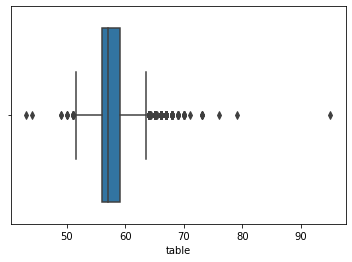

In [23]:
sns.boxplot(x = df_table);

In [24]:
all_outliers=(df_table < lower_bound) | (df_table > upper_bound)
all_outliers

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [25]:
df_table[all_outliers]# number of all outliers is 605

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [26]:
df_table.describe()# before the filling outlier with mean

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [27]:
df_table.mean()

57.45718390804603

In [28]:
df_table[all_outliers]=df_table.mean()
df_table[all_outliers]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

In [29]:
df_table.describe()# after the filling outlier with mean

count    53940.000000
mean        57.374344
std          2.062702
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

### Type 2-) Filling values of outliers with the sequeeze method 

* It may be useful to use this method if the number of outlier  observations is proportionally high.

#### 1-)Filling the values of  lower outlier with lower bound value 

In [30]:
df_table = df["table"].copy()
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [31]:
lower_outlier= df_table < lower_bound
lower_outlier[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [32]:
df_table[lower_outlier]# the values before the filling

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [33]:
df_table[lower_outlier]=lower_bound


In [34]:
df_table[lower_outlier]# the values after the filling

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

#### 2-)Filling the values of  upper outlier with upper bound value 

In [35]:
upper_outlier= df_table > upper_bound
upper_outlier[0:10]

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [36]:
df_table[upper_outlier]# the values before the filling

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [37]:
df_table[upper_outlier]=upper_bound

In [39]:
df_table[upper_outlier] # the values after the filling

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 589, dtype: float64